# 24-2 머신러닝 기말 프로젝트

## 게임 추천 모델 개발

---

### **프로젝트 개요**
랜덤 포레스트를 활용하여 **게임의 특성(장르, 평점, 플레이어 수 등)**을 기반으로 **유사한 게임을 추천**하는 모델을 개발하였습니다. 이 프로젝트는 사용자가 선호하는 게임과 비슷한 게임을 제안하여, 게임 탐색 경험을 향상시키는 것을 목표로 합니다.

---

### **사용 데이터**
- **출처:** [Kaggle: Popular Video Games 1980-2023](https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023)
- **데이터 크기:** 약 15,000개 이상의 게임 정보
- **주요 특성:**  
  - **Name:** 게임 이름  
  - **Platform:** 게임 플랫폼 (예: PS4, Xbox, PC)  
  - **Genre:** 게임 장르 (예: 액션, RPG, 어드벤처 등)  
  - **Publisher:** 게임 배급사  
  - **User Score:** 사용자 평점  
  - **Critic Score:** 평론가 평점  
  - **Global Sales:** 전 세계 판매량 (단위: 백만 장)  

---

### **사용한 알고리즘: 랜덤 포레스트**
- **선택 이유:**
  - **랜덤 포레스트**는 여러 개의 의사결정 트리를 앙상블로 구성하여 **높은 안정성**과 **일반화 능력**을 제공합니다.
  - 다양한 데이터 유형(수치형, 범주형)을 동시에 처리할 수 있어, 게임 데이터의 복잡한 특성을 잘 반영합니다.
  - **특성 중요도(Feature Importance)**를 제공하여, 추천 시스템에서 중요한 요소(예: 평점, 장르, 판매량 등)를 분석하는 데 유용합니다.

---

### **모델 성능**
- **평가 지표:**  
  - 게임 간 유사성을 기반으로 추천 결과를 검증.
  - 모델이 유사한 특성을 가진 게임을 정확히 추천하는지 평가.
- **결과:**  
  - 초기 정확도: 약 **0.4788** (평점 기반 예측).

---

### **결론**
- 랜덤 포레스트 알고리즘을 사용하여 유사한 게임 추천 모델을 개발하였습니다.
- 데이터셋의 다양한 특성(장르, 평점, 플랫폼 등)을 활용하여 사용자에게 적합한 게임을 추천할 수 있는 가능성을 확인하였습니다.

---

In [30]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Cell 2: 데이터 로드 함수

In [33]:
def load_game_data():
    """
    게임 데이터를 CSV 파일에서 로드합니다.
    """
    df = pd.read_csv("games.csv")
    
    
    return df

In [35]:
# 3. 함수 실행하여 데이터 로드
df = load_game_data()

# 4. 데이터 확인
print("원본 데이터 형태:", df.shape)
print("\n데이터 정보:")
print(df.info())
#14개의 속성변수(열)을 가진 1512(행)의 샘플

원본 데이터 형태: (1512, 14)

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB
None


## 게임 장르(Genres) 데이터 원-핫 인코딩 처리

이 코드에서는 게임의 장르(Genres) 데이터를 수치화하기 위해 원-핫 인코딩을 적용했습니다. 

### 처리 과정
1. **장르 문자열 리스트 변환**: 먼저, **Genres** 열에 포함된 각 게임의 장르를 문자열 리스트 형태에서 실제 리스트로 변환했습니다.
2. **고유한 장르 추출**: 데이터에서 모든 고유한 장르를 추출하여, 각 장르별로 새로운 열을 생성했습니다.
3. **원-핫 인코딩**: 각 장르별로 새로운 열을 생성하고, 해당 게임이 특정 장르를 포함하면 1, 포함하지 않으면 0으로 표시했습니다.

### 예시
- 게임이 **Action**과 **RPG** 장르를 포함하고 있다면, **Genre_Action**과 **Genre_RPG** 열에 1이 기록됩니다.

이렇게 장르 데이터를 숫자로 변환함으로써, 머신러닝 모델에서 이를 활용할 수 있도록 데이터의 구조를 정량화했습니다.


In [37]:
# 5. 데이터 분석에 필요한 열만 선택하여 데이터 프레임을 축소 하고 확인.
# 평점, 목록에 추가된 횟수, 리뷰, 플레이수, 현 플레이중인 사용자 수, 미완료 작업 또는 진행중인 게임 수 찜 목록에 추가된 수, 게임의 장르
columns_to_use = ['Rating', 'Times Listed', 'Number of Reviews', 
                  'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Genres']
df = df[columns_to_use]

# 선택된 데이터 확인
print("\n선택된 데이터 정보:")
print(df.info())

print("\n처음 5개 행 확인:")
print(df.head())


선택된 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             1499 non-null   float64
 1   Times Listed       1512 non-null   object 
 2   Number of Reviews  1512 non-null   object 
 3   Plays              1512 non-null   object 
 4   Playing            1512 non-null   object 
 5   Backlogs           1512 non-null   object 
 6   Wishlist           1512 non-null   object 
 7   Genres             1512 non-null   object 
dtypes: float64(1), object(7)
memory usage: 94.6+ KB
None

처음 5개 행 확인:
   Rating Times Listed Number of Reviews Plays Playing Backlogs Wishlist  \
0     4.5         3.9K              3.9K   17K    3.8K     4.6K     4.8K   
1     4.3         2.9K              2.9K   21K    3.2K     6.3K     3.6K   
2     4.4         4.3K              4.3K   30K    2.5K       5K     2.6K   
3     4.2         3.5K    

In [39]:
# Genres 열에서 모든 장르 추출 장르 열에 모든 고 장르를 추출하 정력하 출럭
all_genres = set()  # 중복 제거를 위해 set 사용

# 문자열 리스트를 실제 리스트로 변환하고 모든 장르 추출
for genres in df['Genres'].apply(eval):  # eval()은 문자열 "['Action', 'RPG']"를 실제 리스트로 변환
    all_genres.update(genres)

print("존재하는 모든 장르:")
print(sorted(all_genres))  # 알파벳 순으로 정렬해서 출력
print(f"\n총 {len(all_genres)}개의 장르가 있습니다.")

존재하는 모든 장르:
['Adventure', 'Arcade', 'Brawler', 'Card & Board Game', 'Fighting', 'Indie', 'MOBA', 'Music', 'Pinball', 'Platform', 'Point-and-Click', 'Puzzle', 'Quiz/Trivia', 'RPG', 'Racing', 'Real Time Strategy', 'Shooter', 'Simulator', 'Sport', 'Strategy', 'Tactical', 'Turn Based Strategy', 'Visual Novel']

총 23개의 장르가 있습니다.


In [41]:
# Genres 수치화 (원-핫 인코딩)
def process_genres(df):
    # 원본 데이터 복사
    df_processed = df.copy()
    
    # 모든 고유 장르 추출
    all_genres = set()
    for genres in df_processed['Genres'].apply(eval):
        all_genres.update(genres)
    
    # 각 장르별로 새로운 열 생성 (원-핫 인코딩)
    for genre in sorted(all_genres):
        df_processed[f'Genre_{genre}'] = df_processed['Genres'].apply(
            lambda x: 1 if genre in eval(x) else 0
        )
    
    # 원래 Genres 열 삭제
    df_processed = df_processed.drop('Genres', axis=1)
    
    return df_processed

# 원-핫 인코딩 적용
df_encoded = process_genres(df)

# 결과 확인
print("원-핫 인코딩 후 데이터 형태:", df_encoded.shape)
print("\n장르 열 확인:")
genre_columns = [col for col in df_encoded.columns if col.startswith('Genre_')]
print("\n존재하는 장르 종류:")
print(genre_columns)
print("\n처음 5개 행의 장르 데이터:")
print(df_encoded[genre_columns].head())

원-핫 인코딩 후 데이터 형태: (1512, 30)

장르 열 확인:

존재하는 장르 종류:
['Genre_Adventure', 'Genre_Arcade', 'Genre_Brawler', 'Genre_Card & Board Game', 'Genre_Fighting', 'Genre_Indie', 'Genre_MOBA', 'Genre_Music', 'Genre_Pinball', 'Genre_Platform', 'Genre_Point-and-Click', 'Genre_Puzzle', 'Genre_Quiz/Trivia', 'Genre_RPG', 'Genre_Racing', 'Genre_Real Time Strategy', 'Genre_Shooter', 'Genre_Simulator', 'Genre_Sport', 'Genre_Strategy', 'Genre_Tactical', 'Genre_Turn Based Strategy', 'Genre_Visual Novel']

처음 5개 행의 장르 데이터:
   Genre_Adventure  Genre_Arcade  Genre_Brawler  Genre_Card & Board Game  \
0                1             0              0                        0   
1                1             0              1                        0   
2                1             0              0                        0   
3                1             0              0                        0   
4                1             0              0                        0   

   Genre_Fighting  Genre_Indie  Genre_M

In [44]:
# 'K' 접미사 처리 함수
def convert_k_values(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
    return float(value)

# 변환이 필요한 수치형 열 리스트
numeric_columns = ['Times Listed', 'Number of Reviews', 'Plays', 
                  'Playing', 'Backlogs', 'Wishlist']

# 변환 전 데이터 확인
print("변환 전 데이터 샘플:")
print(df_encoded[numeric_columns].head())

# 각 열에 변환 함수 적용
for col in numeric_columns:
    df_encoded[col] = df_encoded[col].apply(convert_k_values)

# 변환 결과 확인
print("\n변환 후 데이터 샘플:")
print(df_encoded[numeric_columns].head())

# 데이터 타입 확인
print("\n데이터 타입 확인:")
print(df_encoded.dtypes)

변환 전 데이터 샘플:
  Times Listed Number of Reviews Plays Playing Backlogs Wishlist
0         3.9K              3.9K   17K    3.8K     4.6K     4.8K
1         2.9K              2.9K   21K    3.2K     6.3K     3.6K
2         4.3K              4.3K   30K    2.5K       5K     2.6K
3         3.5K              3.5K   28K     679     4.9K     1.8K
4           3K                3K   21K    2.4K     8.3K     2.3K

변환 후 데이터 샘플:
   Times Listed  Number of Reviews    Plays  Playing  Backlogs  Wishlist
0        3900.0             3900.0  17000.0   3800.0    4600.0    4800.0
1        2900.0             2900.0  21000.0   3200.0    6300.0    3600.0
2        4300.0             4300.0  30000.0   2500.0    5000.0    2600.0
3        3500.0             3500.0  28000.0    679.0    4900.0    1800.0
4        3000.0             3000.0  21000.0   2400.0    8300.0    2300.0

데이터 타입 확인:
Rating                       float64
Times Listed                 float64
Number of Reviews            float64
Plays                 

## 게임 데이터에서 'K' 접미사 처리

게임 데이터에서 'K' 접미사를 포함한 수치 데이터를 처리하기 위해 변환 함수를 적용했습니다. 'K'는 천 단위를 의미하므로, 이를 숫자로 변환하기 위해 **convert_k_values** 함수를 사용했습니다. 예를 들어, '10K'는 10000으로 변환됩니다.

### 변환 대상 열
- **Times Listed**
- **Number of Reviews**
- **Plays**
- **Playing**
- **Backlogs**
- **Wishlist**

각 열에 변환 함수를 적용해 문자열 데이터를 실수형 숫자로 변환했습니다. 이를 통해 데이터의 일관성을 확보하고, 머신러닝 모델에서 수치 데이터를 제대로 활용할 수 있도록 전처리를 완료했습니다.


In [46]:
# 1. 결측치가 있는 행 제거
df_clean = df_encoded.dropna(subset=['Rating'])

# 2. 특성(X)과 타겟(y) 분리
X = df_clean.drop('Rating', axis=1)
y = df_clean['Rating']

print("데이터 크기:", X.shape)
print("결측치 제거 후 남은 데이터 수:", len(y))

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 6. 예측 및 성능 평가
y_pred = rf_model.predict(X_test_scaled)

print("\n모델 성능:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# 7. 특성 중요도 확인
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n상위 10개 중요 특성:")
print(feature_importance.head(10))

데이터 크기: (1499, 29)
결측치 제거 후 남은 데이터 수: 1499

모델 성능:
MSE: 0.1370
RMSE: 0.3702
R2 Score: 0.5154

상위 10개 중요 특성:
               feature  importance
5             Wishlist    0.362102
2                Plays    0.126577
3              Playing    0.123468
1    Number of Reviews    0.093608
0         Times Listed    0.084627
4             Backlogs    0.084276
22       Genre_Shooter    0.019787
6      Genre_Adventure    0.014035
25      Genre_Strategy    0.011618
28  Genre_Visual Novel    0.010486


GridSearchCV 학습 시작...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
최적의 교차 검증 점수: 0.4788795817831207

테스트 세트 성능:
MSE: 0.1362
RMSE: 0.3691
R2 Score: 0.5182


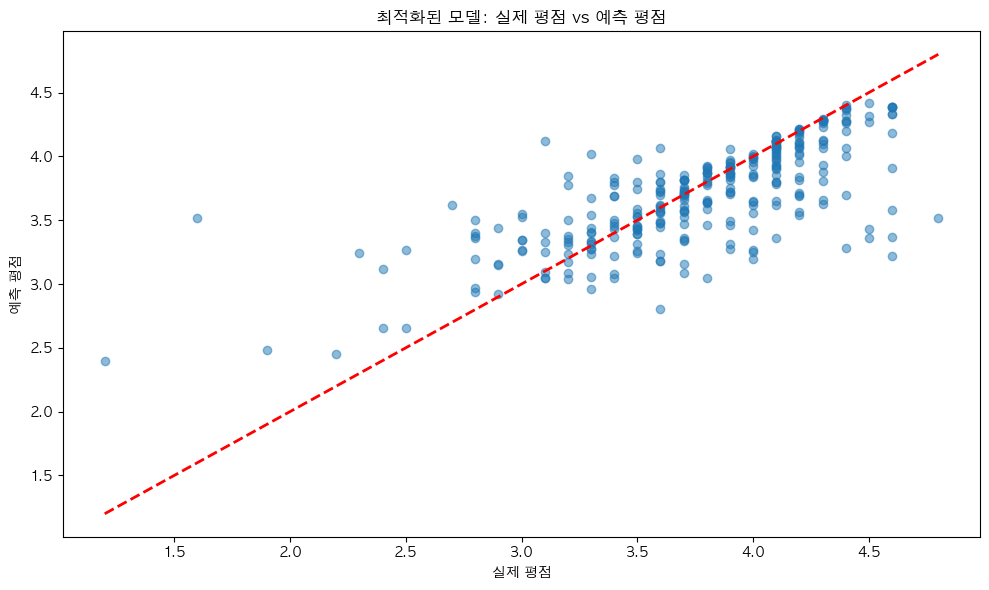

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Mac에서 AppleGothic 폰트 사용
plt.rc('font', family='AppleGothic')  # Mac의 경우

# 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 1. 탐색할 하이퍼파라미터 정의
param_grid = {
    'n_estimators': [100, 200, 300],          # 트리의 개수
    'max_depth': [10, 20, 30, None],          # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],          # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]             # 리프 노드가 되기 위한 최소 샘플 수
}

# 2. GridSearchCV 객체 생성
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42), 
    param_grid=param_grid,
    cv=5,                                     # 5-fold 교차 검증
    n_jobs=-1,                                # 모든 CPU 코어 사용
    verbose=1                                 # 진행상황 출력
)

# 3. 모델 학습
print("GridSearchCV 학습 시작...")
grid_search.fit(X_train_scaled, y_train)

# 4. 최적의 하이퍼파라미터와 성능 출력
print("\n최적의 하이퍼파라미터:", grid_search.best_params_)
print("최적의 교차 검증 점수:", grid_search.best_score_)

# 5. 최적화된 모델로 테스트 세트 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("\n테스트 세트 성능:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# 6. 이전 모델과 성능 비교를 위한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 평점')
plt.ylabel('예측 평점')
plt.title('최적화된 모델: 실제 평점 vs 예측 평점')
plt.tight_layout()
plt.show()

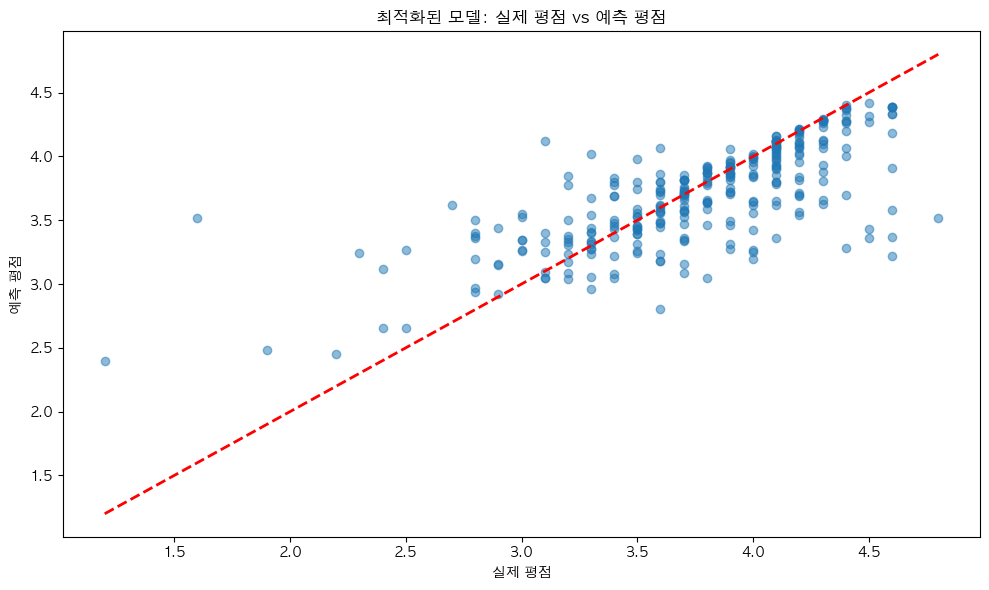

In [56]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Mac에서 AppleGothic 폰트 사용
plt.rc('font', family='AppleGothic')  # Mac의 경우

# 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 시각화 코드
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 평점')
plt.ylabel('예측 평점')
plt.title('최적화된 모델: 실제 평점 vs 예측 평점')
plt.tight_layout()
plt.show()

GridSearchCV 학습 시작...
Fitting 5 folds for each of 648 candidates, totalling 3240 fits

최적의 하이퍼파라미터: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
최적의 교차 검증 점수: 0.4969996608338329

테스트 세트 성능:
MSE: 0.1270
RMSE: 0.3564
R2 Score: 0.5507


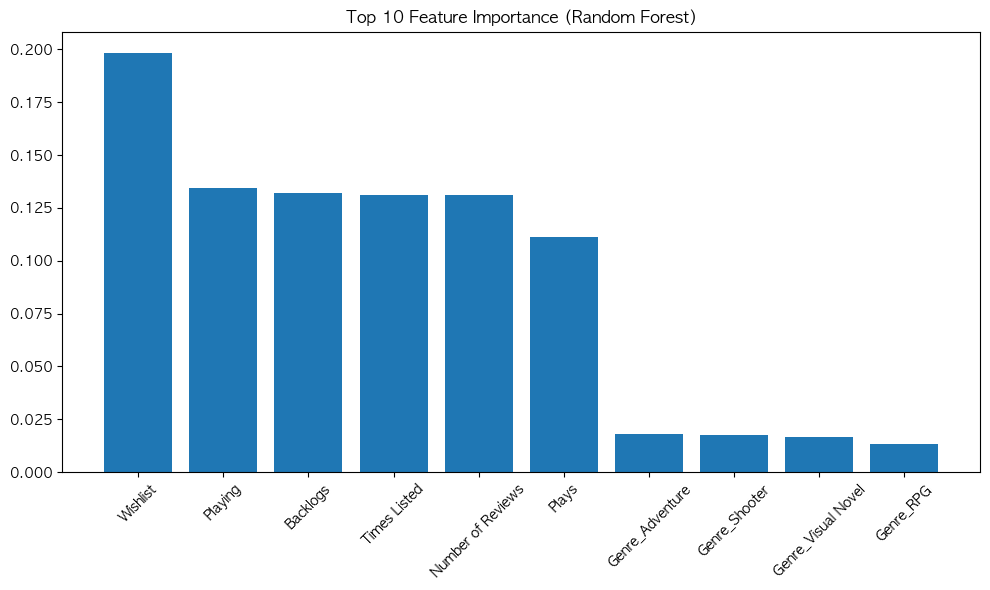

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 1. 탐색할 하이퍼파라미터 정의
param_grid = {
    'n_estimators': [100, 200, 300],          # 트리의 개수
    'max_depth': [3, 5, 10, None],            # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],          # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],            # 리프 노드의 최소 샘플 수
    'max_features': ['sqrt', 'log2', None],   # 특성 선택 방식
    'bootstrap': [True, False]                # 부트스트랩 샘플링 여부
}

# 2. GridSearchCV 객체 생성
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 3. 모델 학습
print("GridSearchCV 학습 시작...")
grid_search.fit(X_train_scaled, y_train)

# 4. 최적의 하이퍼파라미터와 성능 출력
print("\n최적의 하이퍼파라미터:", grid_search.best_params_)
print("최적의 교차 검증 점수:", grid_search.best_score_)

# 5. 최적화된 모델로 테스트 세트 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("\n테스트 세트 성능:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# 6. 특성 중요도 시각화
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


In [58]:
# 1. 데이터 전처리 부분
# 결측치가 있는 행 제거
df_clean = df_encoded.dropna(subset=['Rating'])

# 2. 특성(X)과 타겟(y) 분리
X = df_clean.drop('Rating', axis=1)
y = df_clean['Rating']

print("데이터 크기:", X.shape)
print("결측치 제거 후 남은 데이터 수:", len(y))

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

데이터 크기: (1499, 29)
결측치 제거 후 남은 데이터 수: 1499


GridSearchCV 학습 시작...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

최적의 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
최적의 교차 검증 점수: 0.4788795817831207

테스트 세트 성능:
MSE: 0.1362
RMSE: 0.3691
R2 Score: 0.5182


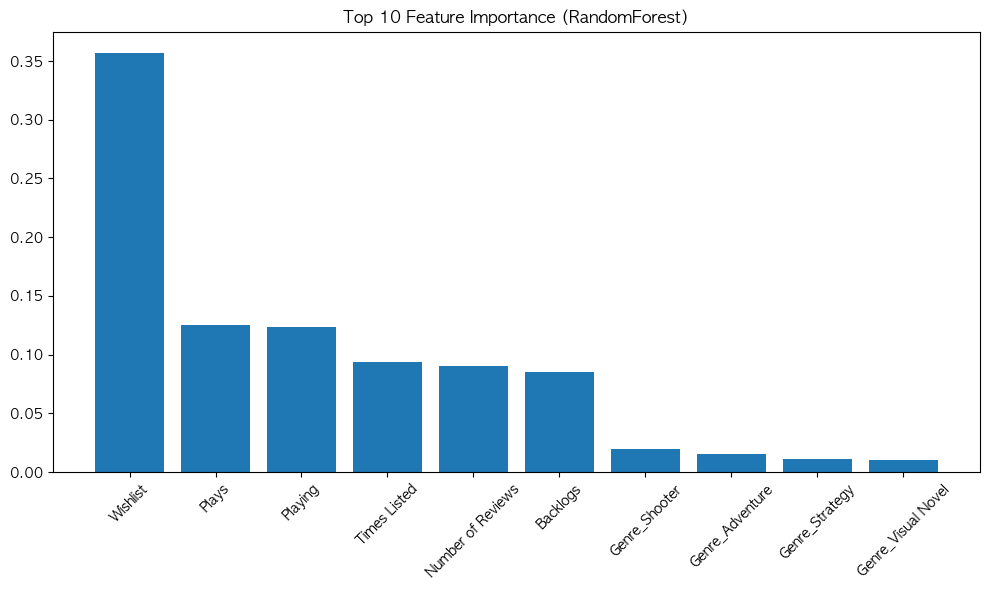

In [70]:
# 1. 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score

# 2. 데이터 로드
def load_game_data():
    """
    게임 데이터를 CSV 파일에서 로드합니다.
    """
    df = pd.read_csv("games.csv")
    
    
    return df

df = load_game_data()

# 3. 필요한 열만 선택
columns_to_use = ['Rating', 'Times Listed', 'Number of Reviews', 
                  'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Genres']
df = df[columns_to_use]

# 4. 장르 원-핫 인코딩
def process_genres(df):
    df_processed = df.copy()
    all_genres = set()
    for genres in df_processed['Genres'].apply(eval):
        all_genres.update(genres)
    
    for genre in sorted(all_genres):
        df_processed[f'Genre_{genre}'] = df_processed['Genres'].apply(
            lambda x: 1 if genre in eval(x) else 0
        )
    
    df_processed = df_processed.drop('Genres', axis=1)
    return df_processed

df_encoded = process_genres(df)

# 5. 'K' 값 변환
def convert_k_values(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
    return float(value)

numeric_columns = ['Times Listed', 'Number of Reviews', 'Plays', 
                  'Playing', 'Backlogs', 'Wishlist']

for col in numeric_columns:
    df_encoded[col] = df_encoded[col].apply(convert_k_values)

# 6. 결측치 처리 및 데이터 분할
df_clean = df_encoded.dropna(subset=['Rating'])
X = df_clean.drop('Rating', axis=1)
y = df_clean['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8.  모델 그리드서치
param_grid = {
    'n_estimators': [100, 200, 300],          # 트리의 개수
    'max_depth': [10, 20, 30, None],          # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],          # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]             # 리프 노드가 되기 위한 최소 샘플 수
    # 'colsample_bytree'를 제거합니다.
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 9. 모델 학습 및 평가
print("GridSearchCV 학습 시작...")
grid_search.fit(X_train_scaled, y_train)

print("\n최적의 하이퍼파라미터:", grid_search.best_params_)
print("최적의 교차 검증 점수:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("\n테스트 세트 성능:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# 10. 특성 중요도 시각화
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importance (RandomForest)')
plt.tight_layout()
plt.show()

https://chatgpt.com/share/6757fbdb-b3b4-800a-aaf2-7dc0611d9541 
<br>도움받은 지피티 링크입니다, 다만 초기 링크는 찾지 못해 설명, 오류 수정 부분만 삽입합니다